# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


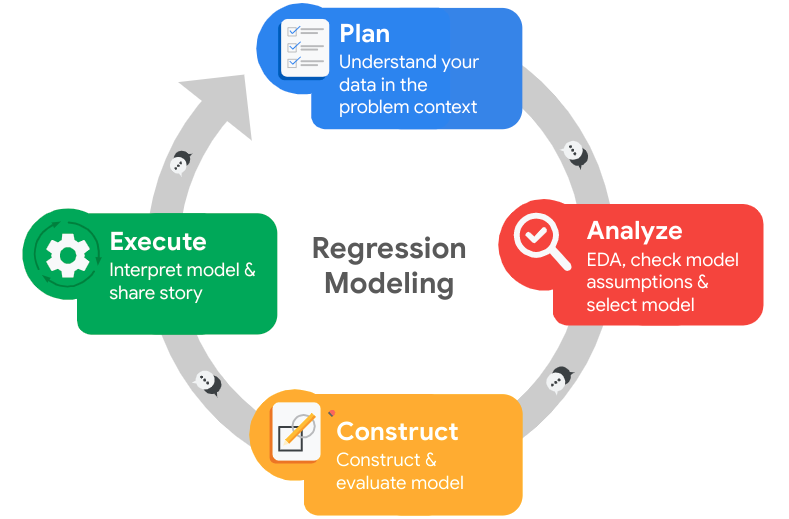

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. HR Sailfort is the stakeholder
2. My job is to find why employees are leaving and to find a model that can predict if someone is likely to leave or not.
3. My initial observations and thoughts of the data is that many employees are in the "low" bracket of salary and not many are getting promotions even after being with the company for many years.
4. Resources are many of my old notebooks and prior work which can be found in my repository, and https://pandas.pydata.org/docs/
5. Some ethical concerns currently is what if there are factors some employees can't help? Health issues, family issues, outside of work accidents or anything else that could easily lead to someone leaving. Considering those individuals as just someone who leaves could leave this data very biased.


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
column_names = list(df0)
print(column_names)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


In [6]:
# Rename columns as needed
df0.rename(columns={'number_project': 'number_of_projects', 'average_montly_hours': 'avg_monthly_hours',
                    'time_spend_company': 'tenure', 'Work_accident': 'work_accident', 'left': 'quit',
                   'Department': 'department', 'last_evaluation': 'last_eval_score'},inplace=True)

# Display all column names after the update
df0.head()

,satisfaction_level,last_eval_score,number_of_projects,avg_monthly_hours,tenure,work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_eval_score          0
number_of_projects       0
avg_monthly_hours        0
tenure                   0
work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_eval_score,number_of_projects,avg_monthly_hours,tenure,work_accident,quit,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_eval_score,number_of_projects,avg_monthly_hours,tenure,work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'Tenure Outlier Detection')

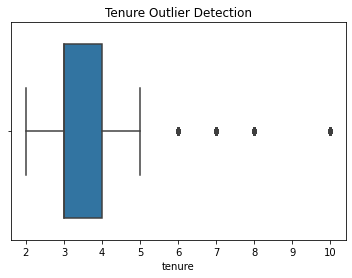

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x=df1["tenure"])
plt.title('Tenure Outlier Detection')

In [12]:
# Determine the number of rows containing outliers

#computing percentiles - 25%
percentile25 = df1['tenure'].quantile(0.25)

#computing percentiles - 75%
percentile75 = df1['tenure'].quantile(0.75)

#interquartile range
iqr = percentile75 - percentile25

# Upper and Lower limit for non-outlier values
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# subset of data outliers
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# count of rows containing outliers
print("Number of outlier rows:", len(outliers))


Lower Limit: 1.5
Upper Limit: 5.5
Number of outlier rows: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. So far i've noticed that the average hours per month is 201.050337 meaning the average employee is working 50.26 hours a week. With further data exploration I will see how many of these employees are in the "low" salary bracket. 

2. With distributions it seems the satisfaction level mean is about 61% which isn't horrible but also could be much better, especially with a 24% mean of employees quitting. 

3. I made the changes of naming columns, fixing spelling mistakes, making the column names make more sense to work with. Removing duplicates that didn't need to be in the dataset. Also checked if I needed to remove any null values but this dataset did not have any nulls present.

4. EDA is very important before constructing a prediction model because models can be very sensitive to oulier data or nulls, making the predictions inaccurate with data being included that is not apart of the end process. Even changing names of certain variables and fixing spelling mistakes can help prevent errors down the line.

5. Some of the resources I used was my notes from my repository, https://seaborn.pydata.org/generated/seaborn.boxplot.html , and https://pandas.pydata.org/docs/index.html .

6. I have a couple of ethical concerns that could be proven not needed later, but as it stands i have concerns when it comes to employees possible quitting or even being fired for outside reasons because the reasons of leaving are not provided, this gives the possibility that the data could be biased against individuals who would have stayed if they could have. Did any of the employees get laid off? Or let go for reasons out of their control? These are concerns i'm thinking about because in those cases it would not be employee retention that is the sole issue.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['quit'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['quit'].value_counts(normalize=True))

0    10000
1     1991
Name: quit, dtype: int64
0    0.833959
1    0.166041
Name: quit, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_eval_score        11991 non-null  float64
 2   number_of_projects     11991 non-null  int64  
 3   avg_monthly_hours      11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   quit                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


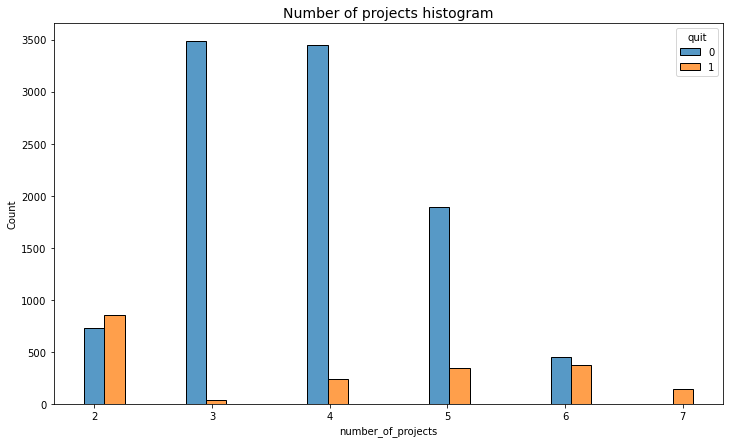

In [15]:
# Create a plot as needed
fig, ax = plt.subplots(1, figsize = (12,7))
tenure_stay = df1[df1['quit']==0]['number_of_projects']
tenure_left = df1[df1['quit']==1]['number_of_projects']
ax = sns.histplot(data=df1, x='number_of_projects', hue='quit', multiple='dodge', shrink=2)
ax.set_title('Number of projects histogram', fontsize='14');

This histogram shows the number of projects an employee would have at one given time and how many of those left with the amount of work. Showing that pushing towards 6 projects more employees would leave and at 7 there are no employees that stayed. As for the group of 2 projects there could be a few reasons as to why, there is a high turnover there is a possibility that employees who were working far less than others were let go.  

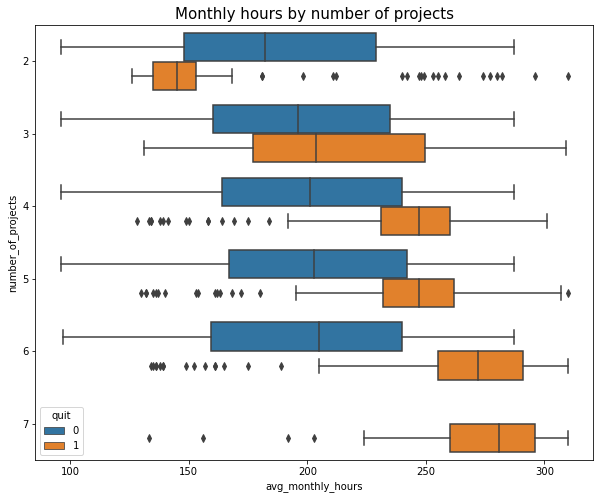

In [16]:
# Create a plot as needed
plt.figure(figsize=(10,8))
sns.boxplot(data=df1, x='avg_monthly_hours', y='number_of_projects', hue='quit', orient='h')

plt.title('Monthly hours by number of projects', fontsize='15');

The boxplot above further echoes the barplot, but here showing the increasing amount of projects increases the amount of hours but those hours are being pushed well past the average of 201 hours monthly. 


Diving further I wanted to see what promotions looked like in comparison to hours worked.

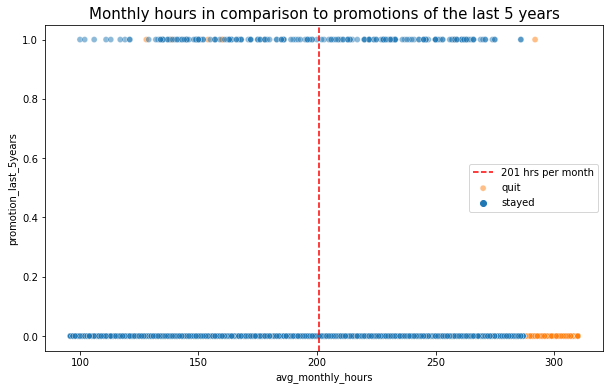

In [17]:
# Create a plot as needed
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='avg_monthly_hours', y='promotion_last_5years', hue='quit', alpha=0.5)
plt.axvline(x=201, color='red', ls='--')
plt.legend(labels=['201 hrs per month', 'quit', 'stayed'])
plt.title('Monthly hours in comparison to promotions of the last 5 years', fontsize='15');

The scatterplot above gives insight that employees who work the most amount of hours for the company are not typically the ones getting promoted. Many of those who worked the most amount of hours and did not get promoted have quit.

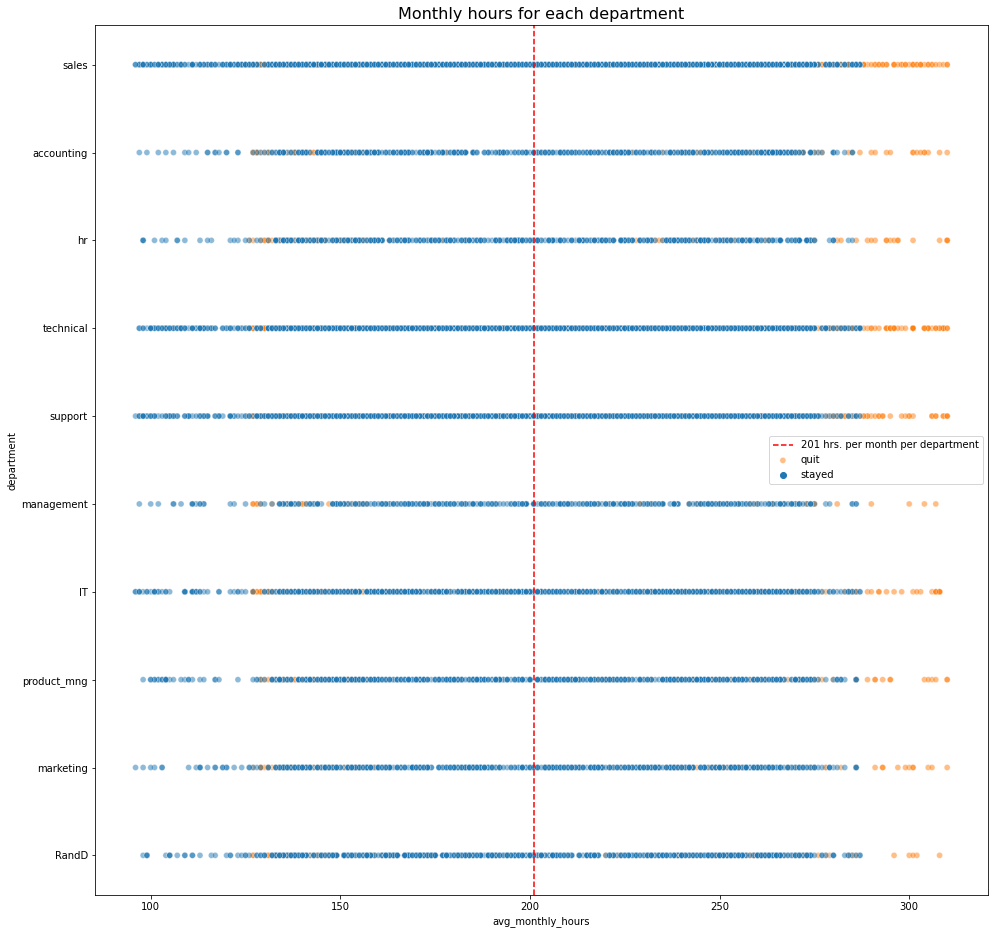

In [18]:
# Create a plot as needed
plt.figure(figsize=(16,16))
sns.scatterplot(data=df1, x='avg_monthly_hours', y='department', hue='quit', alpha=0.5)
plt.axvline(x=201, color='red', label='201 hrs. per month', ls='--')
plt.legend(labels=['201 hrs. per month per department', 'quit', 'stayed'])
plt.title('Monthly hours for each department', fontsize='16');

Looking over this scatterplot I can see that sales and technical departments have the highest amount of employees working well over the 280 hours a month, far beyond the average of 201 hours. At 280 hours thats 70 hours a week and the equivalent to 14 hour days.

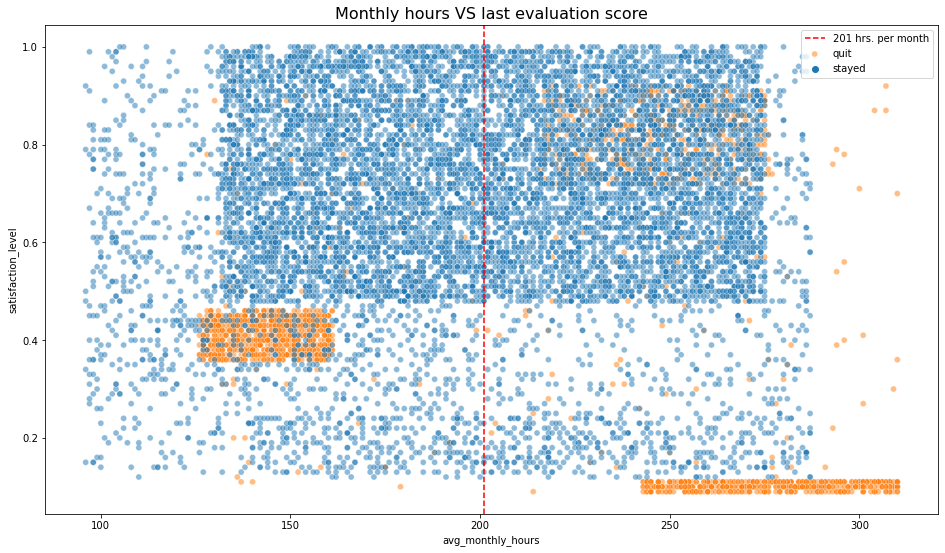

In [19]:
# Create a plot as needed
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='avg_monthly_hours', y='satisfaction_level', hue='quit', alpha=0.5)
plt.axvline(x=201, color='red', label='201 hrs. per month', ls='--')
plt.legend(labels=['201 hrs. per month', 'quit', 'stayed'])
plt.title('Monthly hours VS last evaluation score', fontsize='16');

Here is the monthly hours vs the last evaluation score per employee. I used 201 hours being the average because this was the average within the entire dataset, meaning that each employee on average was working 50 hour weeks or 10 hour days. We have a major increase of people leaving the company and rating their satisfaction very low when they are being worked up towards 230 hours monthly and some employees were even pushed towards 300+ hours monthly and none of them are with the company still.

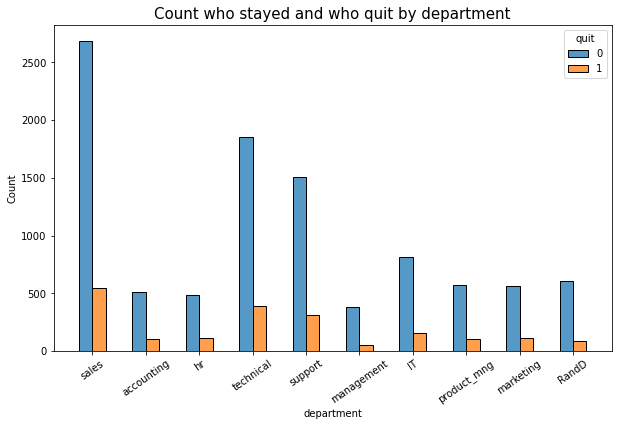

In [20]:
# Create a plot as needed
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='department', hue='quit', discrete=1,
            hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='35')
plt.title('Count who stayed and who quit by department', fontsize=15);

In [21]:
# Counts of each department
df1["department"].value_counts()


sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

### Insights

What I'm gathering from this data I've explored is that much of the high turnover comes from employees being over worked and under appreciated when it comes to promotions and moving up in the company. Management seems to have the least amount of hours worked in comparison to other departments. Which is a sign of a more hands off leadership leaving the departments to do all of the work on their own. When it comes to the amount of work being done some employees have gone over 14 hour days, this will indeed lead to burn out when these kind of hours are over a prolonged period of time.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The task is to find the prediction whether employees will leave or stay. Being either 1 they will leave or 0 they will stay.

### Identify the types of models most appropriate for this task.

I'm going with a random forest decision model. This will be the best option for predictions with categorical outcomes.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [22]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report



from xgboost import plot_importance
from xgboost import XGBClassifier

import pickle

In [23]:
#Looking over info
### YOUR CODE HERE ###

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_eval_score        11991 non-null  float64
 2   number_of_projects     11991 non-null  int64  
 3   avg_monthly_hours      11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   quit                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [24]:
#Info
df1.describe()

,satisfaction_level,last_eval_score,number_of_projects,avg_monthly_hours,tenure,work_accident,quit,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [25]:
df1_copy = df1.copy()

#Encoding for dummies
df1_copy['salary'] = (
    df1_copy['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df1_copy = pd.get_dummies(df1_copy, drop_first=False)

df1_copy.head()

,satisfaction_level,last_eval_score,number_of_projects,avg_monthly_hours,tenure,work_accident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


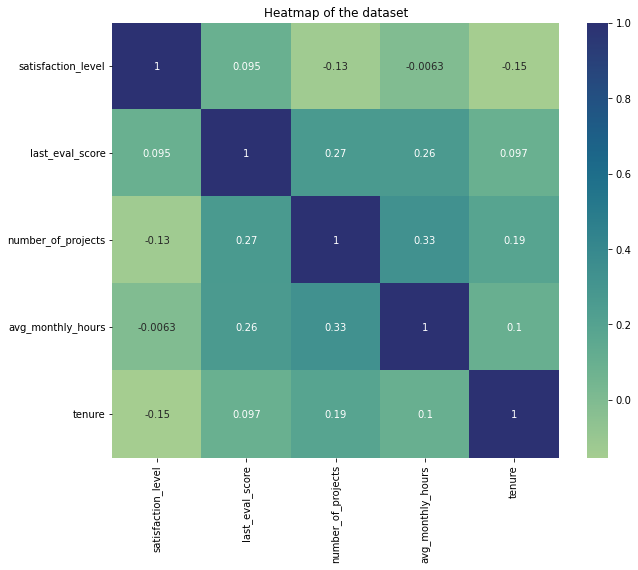

In [26]:
#Heatmap of correlation of variables
plt.figure(figsize=(10, 8))
sns.heatmap(df1_copy[['satisfaction_level', 'last_eval_score', 'number_of_projects', 'avg_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

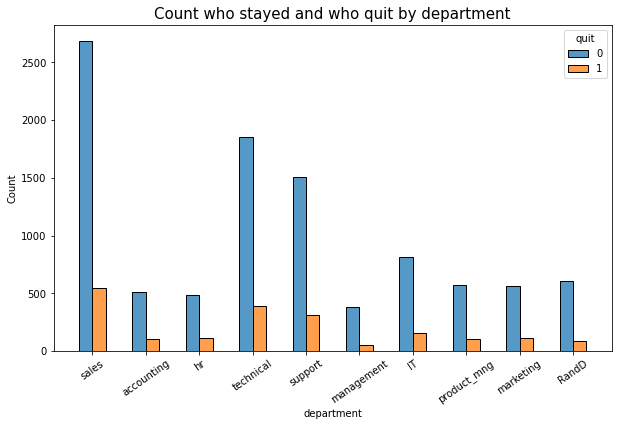

In [27]:
#Call back to who quit and who stayed by department
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x='department', hue='quit', discrete=1,
            hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='35')
plt.title('Count who stayed and who quit by department', fontsize=15);

In [28]:
# Outcome variable

y = df1_copy['quit']

#Displaying 'y'

y.head()

0    1
1    1
2    1
3    1
4    1
Name: quit, dtype: int64

In [29]:
# Features selection

X=df1_copy.drop('quit', axis=1)

#displaying 'X'
X.head()

,satisfaction_level,last_eval_score,number_of_projects,avg_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
#Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [31]:
tree = DecisionTreeClassifier(random_state=42)

#Parameters Dictionary
cv_params = {'max_depth': [4, 6, 8, None],
            'min_samples_split': [2, 5, 1],
            'min_samples_leaf': [2, 4, 6],
            }

#Scoring Metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

#GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [32]:

tree1.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [33]:
#best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [34]:
#AUC Score
tree1.best_score_

0.9758019560054096

With a score of 0.97 for the AUC this shows that the model will be great on making predictions for employee retention.

In [35]:
#pickling model

path = '/home/jovyan/work/'

In [36]:
def write_pickle(path, model_object, save_name:str):
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [37]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [38]:
#Results for model

def make_results(Model1:str, model_object, metric:str):
 

    # Dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Getting all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolatting the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Accuracy, precision, recall, and f1 score
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Creating table of results
    table = pd.DataFrame({'model': [Model1],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        'auc' : [auc]
                        })

    return table

In [39]:
tree1_results = make_results('decision tree', tree1, 'auc')
tree1_results

,model,precision,recall,F1,accuracy,auc
0,decision tree,0.966878,0.918288,0.941941,0.981208,0.975802


My results are looking great across the board, with a typical score of 0.65 as acceptable all of these scores being above 0.90 means this model will perform very well predicting employee retention. 

In [40]:
#Instantiating Model Round 1
rf = RandomForestClassifier(random_state=42)

#hyperparameters
cv_params = {'max_depth' : [4, 6, None],
            'max_features' : [1.0],
            'max_samples' : [0.5, 1.0],
            'min_samples_split' : [4],
            'min_samples_leaf' : [2,3,4],
            'n_estimators' : [300],
            }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

#Instantiating GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [41]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [42]:
rf1.best_score_

0.9816938739229546

In [43]:
rf1.best_params_

{'max_depth': 6,
 'max_features': 1.0,
 'max_samples': 0.5,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 300}

In [44]:
#All CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_results)
print(rf1_cv_results)

           model  precision    recall        F1  accuracy       auc
0  decision tree   0.966878  0.918288  0.941941  0.981208  0.975802
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.966163  0.910245  0.937225  0.979762  0.981694


Looking over the results of the Random forest compared to the decision tree the decision tree has better scores across the board aside from the AUC being 0.98. So in this case the champion is going to be the decision tree.

In [45]:
#Test scores on test data
rf_preds = tree1.best_estimator_.predict(X_test)

In [46]:
def get_test_scores(model_name:str, preds, y_test_data):
  
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [51]:
#Getting the test scores
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
print(tree1_results)
print(rf1_cv_results)

           model  precision    recall        F1  accuracy       auc
0  decision tree   0.966878  0.918288  0.941941  0.981208  0.975802
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.966163  0.910245  0.937225  0.979762  0.981694


In [52]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
 
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [53]:
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.980892,0.927711,0.95356,0.98499,0.962055


In [ ]:
#Saving test model
write_pickle(path, rf1, 'hr_rf1')

In [ ]:
rf1 = read_pickle(path, 'hr_rf1')

After running the test on the models multiple times the results seem to point to the random forest test scoring higher. I'm going to run the model with more test predictions and see results from there. But thus far it appears the random forest model will be the champion.

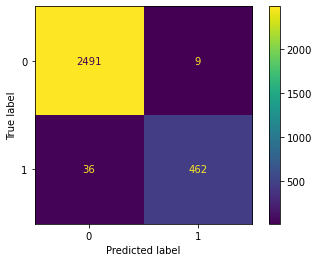

In [54]:
#Creating Confusion Matrix
preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

#Plotting Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_)
disp.plot(values_format='');

This model is a great model for the predictions. It does predict a bit high on the end of false positives so in some cases the model could assume an employee is going to leave the company in some way but  they end up staying. But overall it's still a great model.

In [58]:
from sklearn.tree import plot_tree

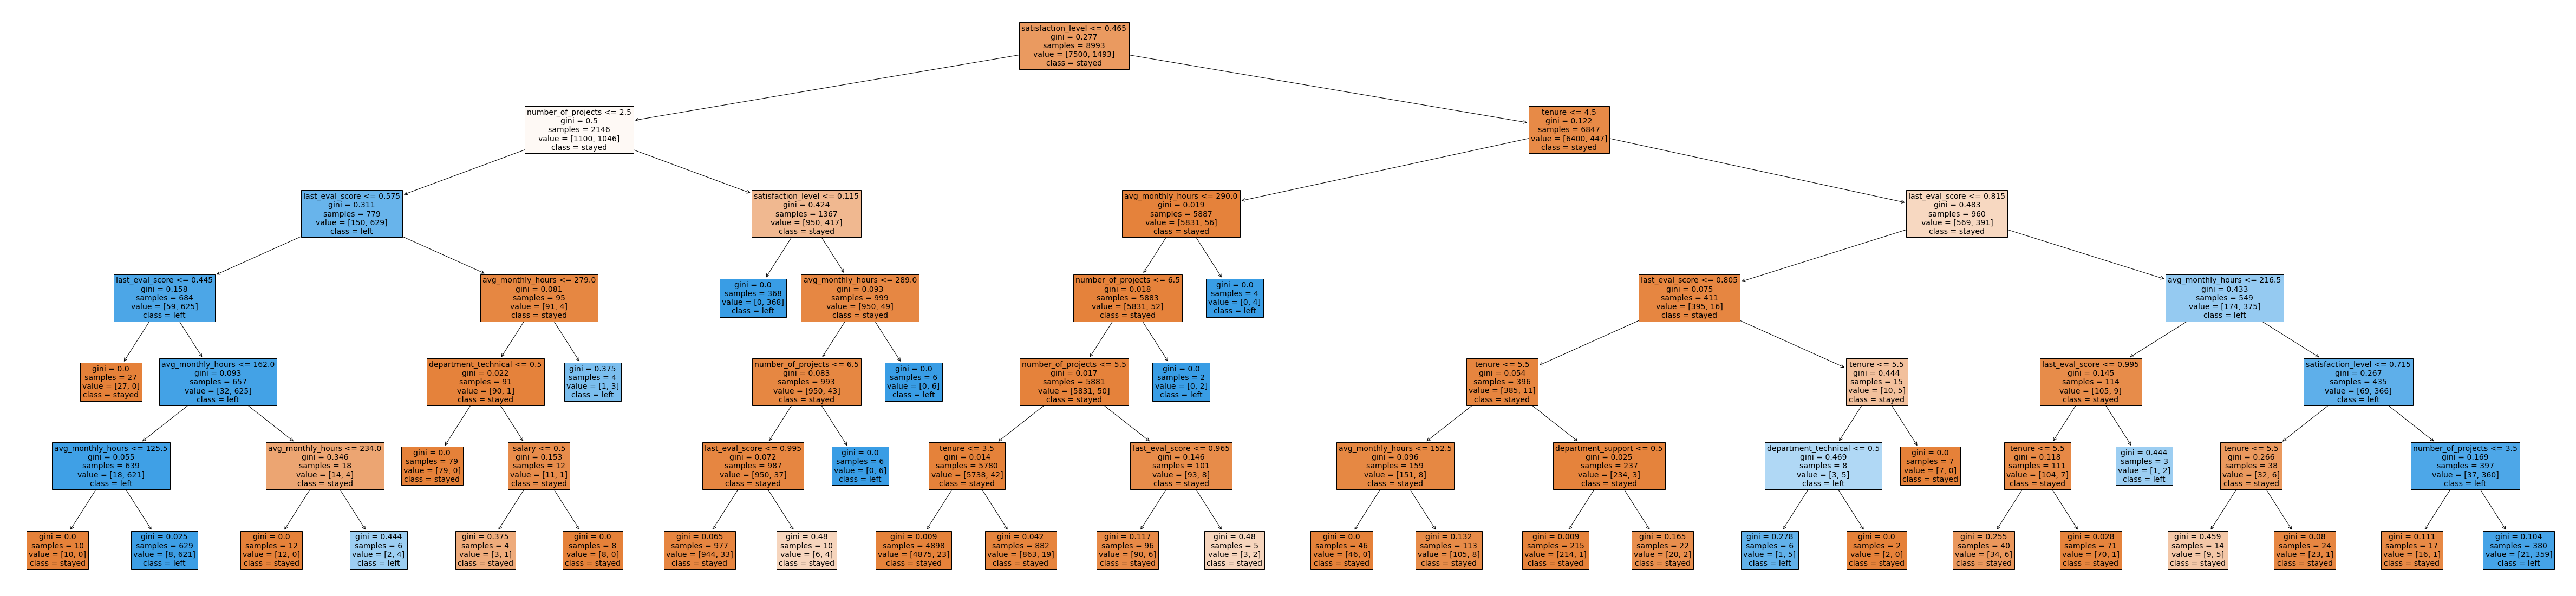

In [61]:
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=10, fontsize=14, feature_names=X.columns,
         class_names={0 : 'stayed', 1 : 'left'}, filled=True);
plt.show()

(Double-click to zoom in) Here is the actual decision tree with the selected max depth being 10.Though the Random Forest ended up being champion I decided to still plot this decision tree which is the first intial tree that was creadted.

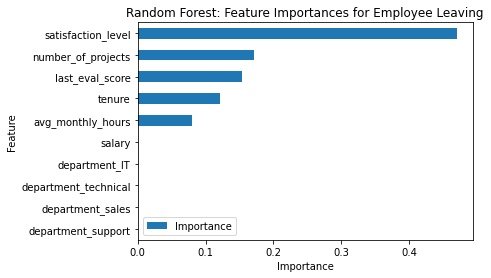

In [63]:
#Creating barplot of random forest feature importances

feat_impt = rf1.best_estimator_.feature_importances_

ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

#creating labels for top 10 feats.
feat = X.columns[ind]
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving",fontsize=12)

ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")
plt.show()


So this bar plot is showing that the importance of making predictions was heavily reliant on the satisfaction rating of each employee. This could be the reason it has a chance to predict a flase positive because someone could really not in enjoy the company and rate it low but still decide to stay with the company long term.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Insights that emerged is overall workplace satisfaction is very low, this is a major deciding factor into if someone is going to stay with the company or not. Second to the amount of projects employees get / have. Both of these are in line and make sense, if employees are being over worked with too many projects they are more likely to be dissatisfied and leave.

2. My recommendations would be to have a set limit on how many projects a team or department can have at one time and to ensure the work is being distributed evenly. With EDA there are visualizations of the amount of hours many employees had to work due to so many projects and there was a sizeable amount of employees working more than 250 hours a month. The company should prioritize making the satisfaction rating increase which would then in turn hold the employee retention.

3. I would let my manager know there is other places the company could focus on that may or may not be the major factors such as, management and promotions after 5 years. This isn't a direct contributing factor in importance but something that on a human level would most certainly make an impact.

4. There is always room for possible improvement but with the high scores of above .90 across the board it would take much more computing time for the random forest for a very slight increase.

5. The information I found in the data that could answer some questions really remains around the overall performance of the company in all departments, a lot of areas seem to be overworked and with little to no growth in the company even after years of tenure. Sales and technical are the departments that get hit the hardest with very long hours and sales has a very high turnover. Focusing on what the departments need to function better as a team I think would prove to be very useful.

6. In this stage I used a lot of work from previous courses my assignments of completed notebooks came in handy to help me replicate a lot of code and re-implement it. Some websites I used frequently was: https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html , https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier , https://pandas.pydata.org/docs/index.html

7. My ethical concerns have gone down after working with the data and getting to a conclusion with a great performing model. The one concern I have now though is if the prediction is that someone may not stay with the company but they do in fact end up staying or have the desire to stay, they may be treated in a way that is as if they are going to leave, make a mistake, or under perform because the model predicted such.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Using a random forest model instead of the standard decision tree I got scores of 0.90, which is great! It has an AUC of 96.2%, accuracy of 98.4%, F1 of 95.3%, recall of 92.7%, and precision of 98.0%. 

### Conclusion, Recommendations, Next Steps

Move to a plan for departments of evenly distributing workload to prevent over work with too many projects, ensure that employees that have been with the company and are in fact doing the most work and go above and beyone properly get promoted. Keeping in mind that the satisfaction of employees is the overall reason we are seeing the high turnover, keeping the employees satisfied and feeling like it's a fair enviornment will in turn have them sticking around much longer.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.